<a href="https://colab.research.google.com/github/ChinmayPaturkar1234/INFOTACT-data-science/blob/main/INFOTACT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ecom cust seg.csv')
df.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [ ]:
df['Gender'] = df['Gender'].fillna('Unknown')
df.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Unknown,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
gender_counts = df["Gender"].value_counts()

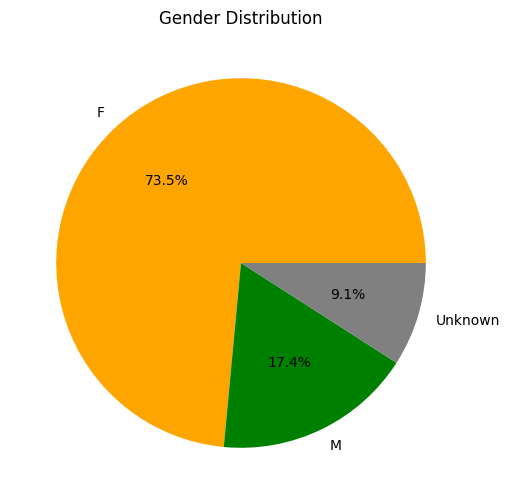

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["orange", "green", "gray"])
plt.title("Gender Distribution")
plt.show()

In [ ]:
df.describe(include='all')

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,NaN,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,NaN,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,NaN,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df['Male'] = (df['Gender'] == 'M').astype(int)
df['Female'] = (df['Gender'] == 'F').astype(int)
df.drop(columns=['Gender'], inplace=True)

df

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Male,Female
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,29997,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,29998,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
29998,29999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Cust_ID                 30000 non-null  int64
 1   Orders                  30000 non-null  int64
 2   Jordan                  30000 non-null  int64
 3   Gatorade                30000 non-null  int64
 4   Samsung                 30000 non-null  int64
 5   Asus                    30000 non-null  int64
 6   Udis                    30000 non-null  int64
 7   Mondelez International  30000 non-null  int64
 8   Wrangler                30000 non-null  int64
 9   Vans                    30000 non-null  int64
 10  Fila                    30000 non-null  int64
 11  Brooks                  30000 non-null  int64
 12  H&M                     30000 non-null  int64
 13  Dairy Queen             30000 non-null  int64
 14  Fendi                   30000 non-null  int64
 15  Hewlett Packard    

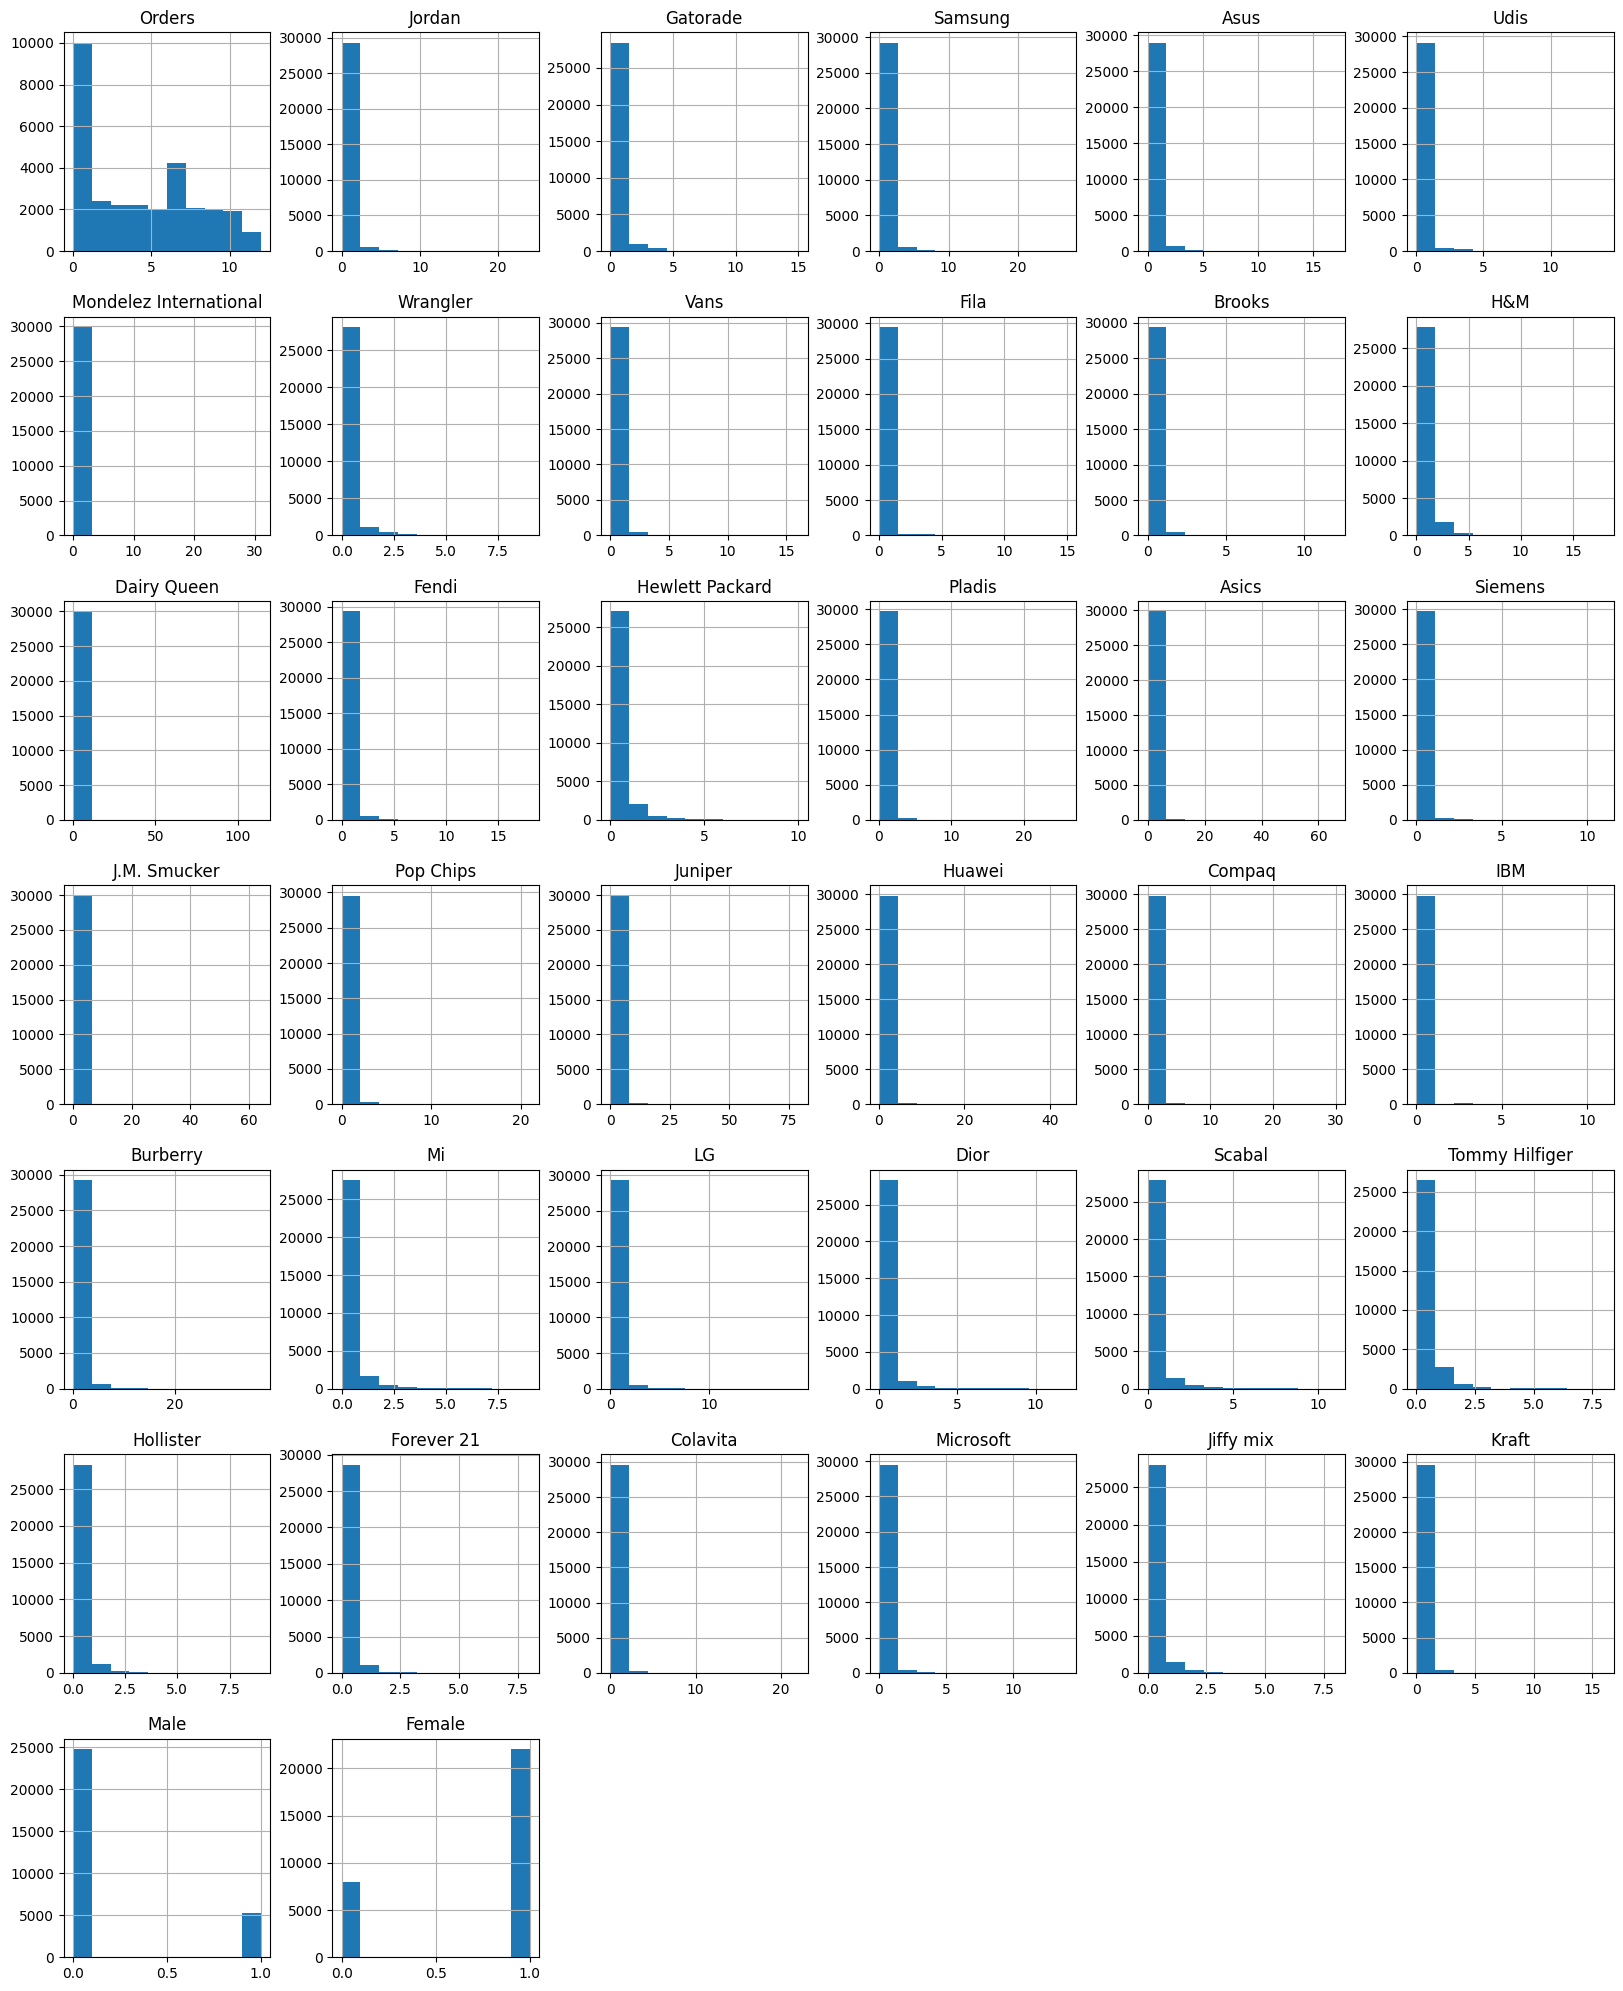

In [ ]:
df.iloc[:,1:].hist(figsize=(20,25))
plt.show()

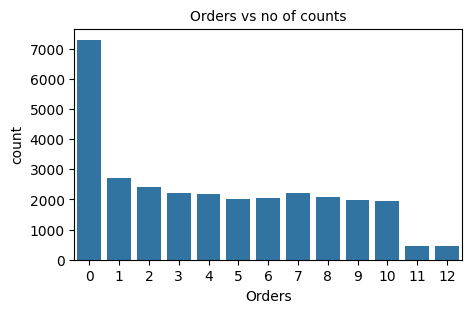

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Orders')
plt.title("Orders vs no of counts", fontsize=10)
plt.show()

In [ ]:
product_columns = df.columns[2:37]
product_columns

Index(['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

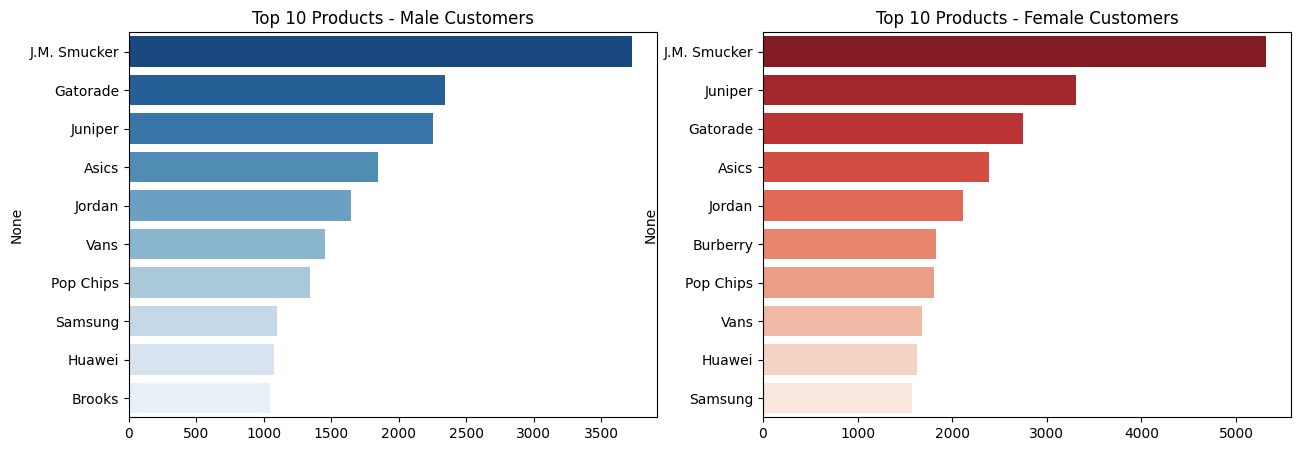

In [ ]:
male_purchases = df[df['Male'] == 1][product_columns].sum().sort_values(ascending=False).head(10)
female_purchases = df[df['Female'] == 0][product_columns].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=male_purchases.values, y=male_purchases.index, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 10 Products - Male Customers")

sns.barplot(x=female_purchases.values, y=female_purchases.index, palette="Reds_r", ax=axes[1])
axes[1].set_title("Top 10 Products - Female Customers")


plt.show()

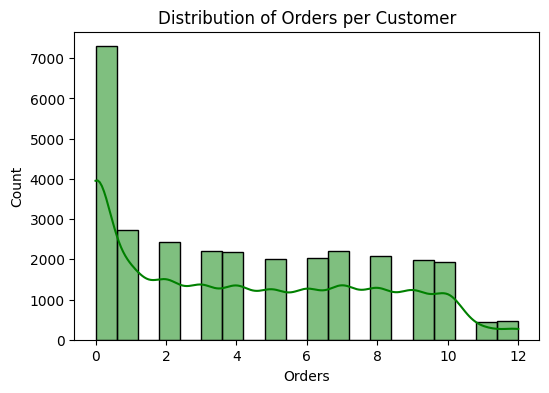

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Orders'], bins=20, kde=True, color='green')
plt.title("Distribution of Orders per Customer")
plt.show()


In [ ]:
product_corr = df.iloc[:, 2:-2].corr()

In [ ]:
df.columns


Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Male',
       'Female'],
      dtype='object')

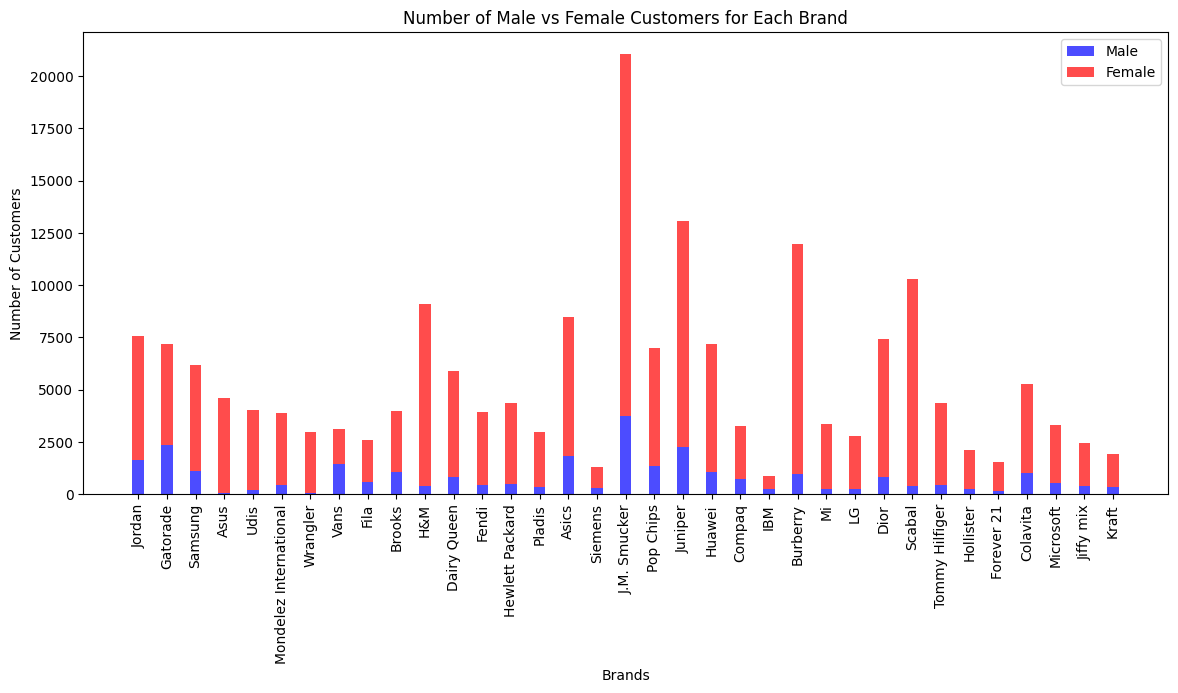

In [ ]:
import matplotlib.pyplot as plt


brand_columns = df.columns[2:-2]


male_counts = df[df['Male'] == 1][brand_columns].sum()
female_counts = df[df['Female'] == 1][brand_columns].sum()


plt.figure(figsize=(14, 6))
x = range(len(brand_columns))

plt.bar(x, male_counts, width=0.4, label="Male", color='blue', alpha=0.7)
plt.bar(x, female_counts, width=0.4, label="Female", color='red', alpha=0.7, bottom=male_counts)


plt.xticks(x, brand_columns, rotation=90)
plt.xlabel("Brands")
plt.ylabel("Number of Customers")
plt.title("Number of Male vs Female Customers for Each Brand")
plt.legend()
plt.show()


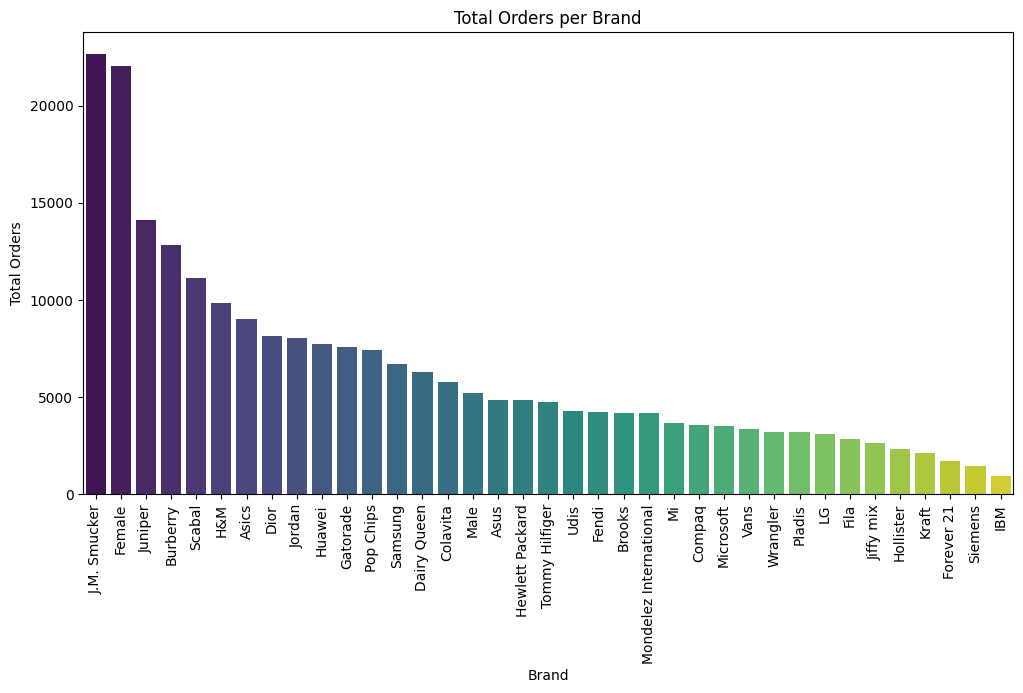

In [ ]:


brand_orders = df.iloc[:, 2:].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_orders.index, y=brand_orders.values, palette="viridis")

# Customization
plt.xticks(rotation=90)  # Rotate brand names for readability
plt.xlabel("Brand")
plt.ylabel("Total Orders")
plt.title("Total Orders per Brand")

plt.show()


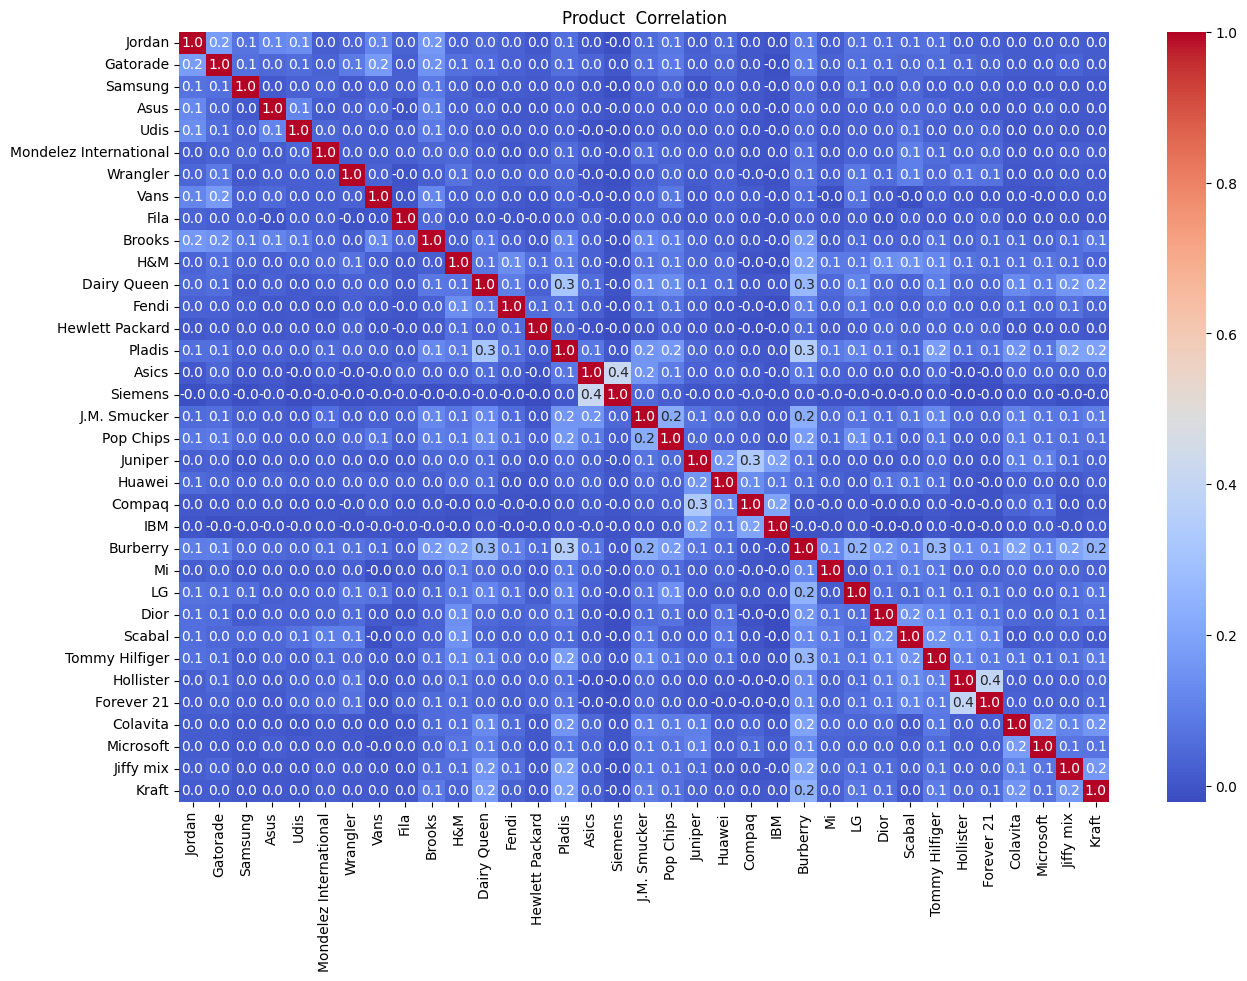

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(product_corr, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Product  Correlation")
plt.show()

In [ ]:
df_cluster = df.iloc[:, 2:-2]
df_cluster.head(1)


,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

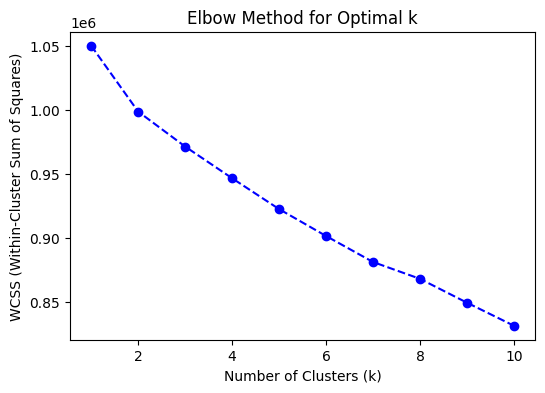

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_cluster)
    score = silhouette_score(df_cluster, labels)
    print(f"Silhouette Score for {k} clusters: {score}")


Silhouette Score for 2 clusters: 0.4224372145891049
Silhouette Score for 3 clusters: 0.4145090057933197
Silhouette Score for 4 clusters: 0.3542292381746056
Silhouette Score for 5 clusters: 0.19372718306631692
Silhouette Score for 6 clusters: 0.18939571025444393
Silhouette Score for 7 clusters: 0.17811195693112705
Silhouette Score for 8 clusters: 0.06533689848957723
Silhouette Score for 9 clusters: 0.0558476607625257
Silhouette Score for 10 clusters: 0.05133159104446308


In [ ]:

X = df.iloc[:, 2:-2]

#K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print(df['Cluster'].value_counts())


Cluster
0    26547
1     3453
Name: count, dtype: int64


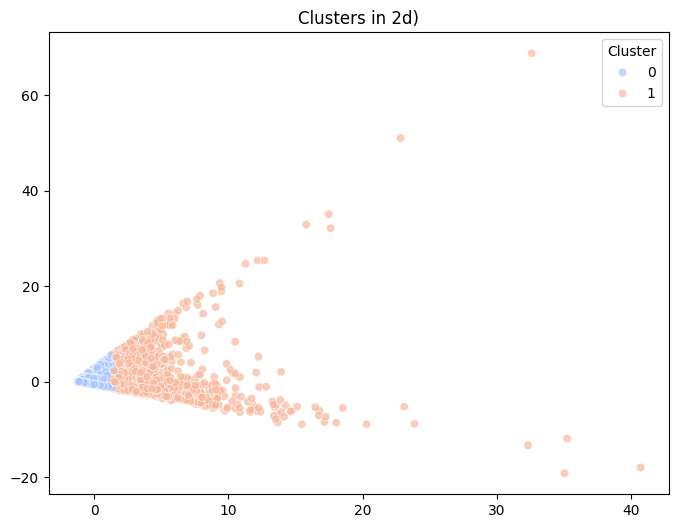

In [ ]:
#using pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='coolwarm', alpha=0.7)
plt.title("Clusters in 2d)")
plt.legend(title="Cluster")
plt.show()


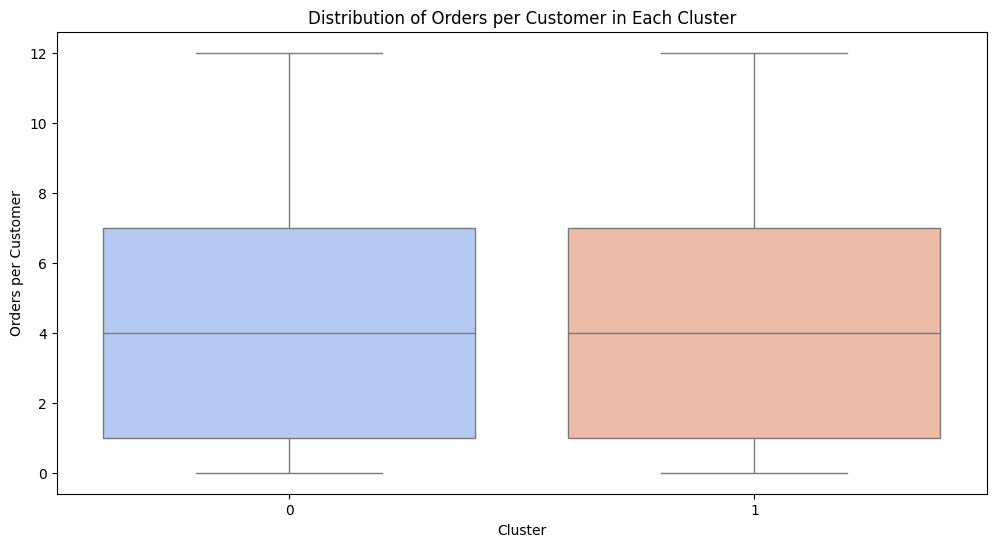

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Cluster'], y=df['Orders'], palette="coolwarm")

plt.xlabel("Cluster")
plt.ylabel("Orders per Customer")
plt.title("Distribution of Orders per Customer in Each Cluster")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

X = df.iloc[:, 2:-2]

#K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print(df['Cluster'].value_counts())

Cluster
0    26349
1     2993
2      658
Name: count, dtype: int64


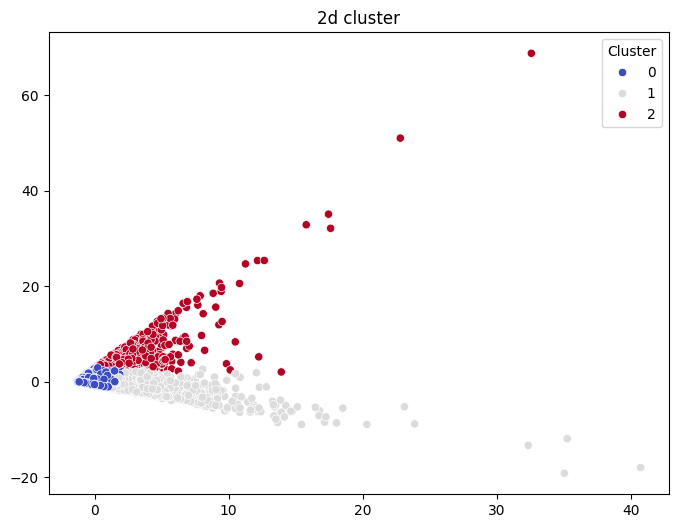

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='coolwarm')
plt.title("2d cluster")

plt.show()

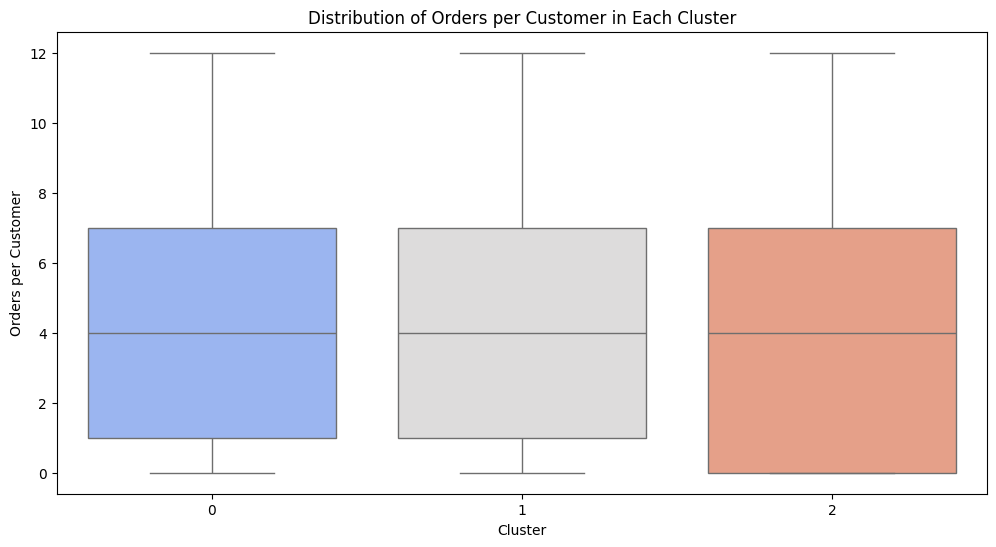

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Cluster'], y=df['Orders'], palette="coolwarm")

plt.xlabel("Cluster")
plt.ylabel("Orders per Customer")
plt.title("Distribution of Orders per Customer in Each Cluster")
plt.show()


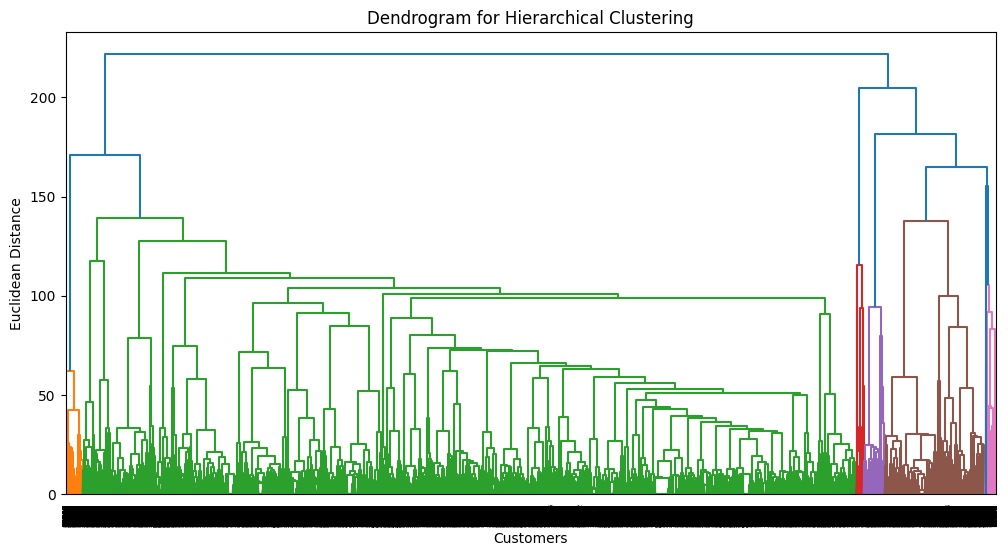

Agg_Cluster
1    25518
0     4247
2      235
Name: count, dtype: int64


In [ ]:
# Compute linkage matrix
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(X, method='ward')

sch.dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Agg_Cluster'] = agg_cluster.fit_predict(X)


print(df['Agg_Cluster'].value_counts())


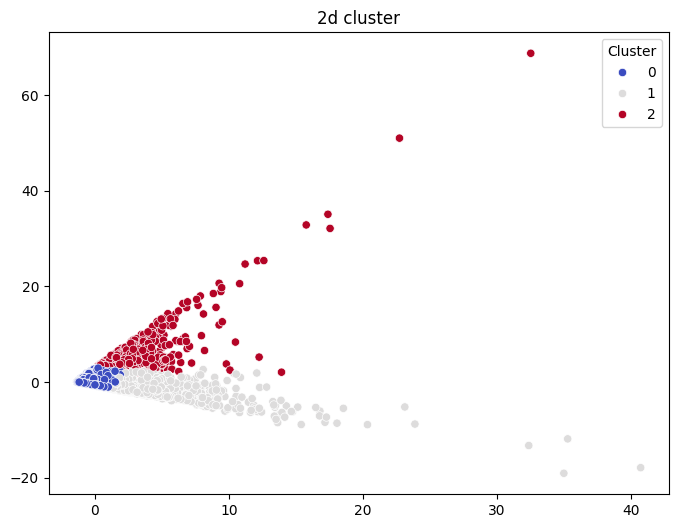

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='coolwarm')
plt.title("2d cluster")

plt.show()